In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
X = df.drop('sales',axis=1)
y = df['sales']

In [5]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [6]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [8]:
poly_features = polynomial_converter.transform(X)

In [10]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [11]:
model = LinearRegression()

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [15]:
y_pred = model.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test,y_pred)

In [17]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Absolute Error: 0.5905974833808129
Mean Squared Error: 0.5231944949055536
Root Mean Squared Error: 0.7233218473857634
Mean Absolute Percentage Error: 0.057911943457152074


In [19]:
train_rmse_errors = []
test_rmse_errors = []

for i in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)

    polynomial_converter.fit(X)

    poly_features = polynomial_converter.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

    model = LinearRegression()

    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)

    test_pred = model.predict(X_test)

    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

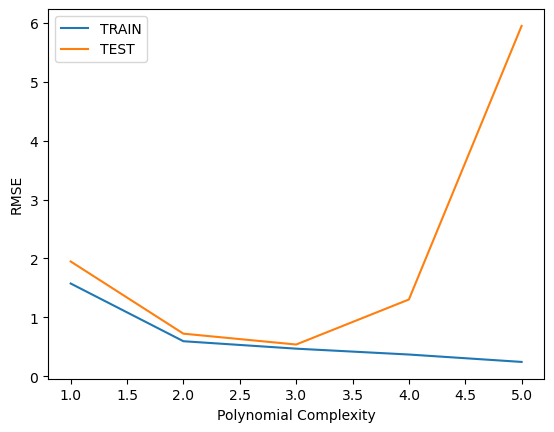

In [25]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')

plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [26]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [27]:
final_model = LinearRegression()

In [28]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [29]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [30]:
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [31]:
loaded_converter = load('final_poly_converter.joblib')

In [32]:
loaded_model = load('final_poly_model.joblib')